# Exploratory Data Analysis of Netflix Movies and TV shows #
### Objective ###
This exploratory data analysis (EDA) aims to uncover patterns and trends in
Netflix’s content library, including content growth, genre distribution,
country-level contributions, and audience targeting strategies.

The goal is to derive business-relevant insights that could inform content
acquisition and production decisions.


In [25]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../data/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Observation ###
the data set contains information on netflix movies and tv shows, including meta data such as title, type, country. Many missing values can already be observed

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Observation ###
- many missing values in directors, cast, country
- few missing values in rating, duration, date_added
- Dtype is object, except for release year
### Conclusion ###
the data set requires cleaning, handling of null values, data type handling.

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation ###
due to incorrect/inapropriate data types, the percentile values, means, std and other metrics cant be evaluated. This emphasizes the need for correct data type handling.
we can ovserve that release date spans from 1925 all the way to 2021, with concentration in year 2014

### Initial Questions ###
- How's netflix content's volume changed overtime
- which genre dominates the catalog
- which contries contribute the most to content
- are there noticable shifts in ratings and durations

In [8]:
df.isna().sum().sort_values(ascending = False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [9]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [10]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [11]:
df_clean = df.copy()

A copy is created to keep raw data integrity

In [12]:
df_clean[['director','cast','country']] = df_clean[['director', 'cast','country']].fillna("Unknown")

In [13]:
df['rating'] = df['rating'].fillna("UR")
invalid_ratings = df_clean['rating'].str.contains("min", case = False, na= False)
df_clean[invalid_ratings][['title','rating','duration']]


,title,rating,duration
5541,Louis C.K. 2017,74 min,NaN
5794,Louis C.K.: Hilarious,84 min,NaN
5813,Louis C.K.: Live at the Comedy Store,66 min,NaN


In [14]:
df_clean.loc[invalid_ratings, 'rating'], df_clean.loc[invalid_ratings,'duration'] = "UR" , df_clean[invalid_ratings]['rating']

In [15]:
df_clean[invalid_ratings][['title','rating','duration']]

,title,rating,duration
5541,Louis C.K. 2017,UR,74 min
5794,Louis C.K.: Hilarious,UR,84 min
5813,Louis C.K.: Live at the Comedy Store,UR,66 min


In [16]:
df_clean['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
UR             6
TV-Y7-FV       6
NC-17          3
Name: count, dtype: int64

We have done 3 things primarily so far: 
- filled missing value for director, cast and country as "Unknown"
- filled unknown ratings as "unknown"
- there were 3 unnecessary ratings such as 66 min, and their duration fields were missing, so we marked their ratings as unrated and swapped the rating in duration.

In [17]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors="coerce")
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

In [18]:
df_clean[['title','date_added','month_added','year_added']].head()

,title,date_added,month_added,year_added
0,Dick Johnson Is Dead,2021-09-25,9.0,2021.0
1,Blood & Water,2021-09-24,9.0,2021.0
2,Ganglands,2021-09-24,9.0,2021.0
3,Jailbirds New Orleans,2021-09-24,9.0,2021.0
4,Kota Factory,2021-09-24,9.0,2021.0


In [19]:
df_clean['duration_in_minutes'] = (df_clean['duration'].astype(str).str.extract("(\d+)").astype(float))
df_clean['duration_type'] = np.where(df_clean['type'] == 'Movie', 'Minutes', 'Season')

In [20]:
df_clean[["type", "duration", "duration_in_minutes", "duration_type"]].head()


,type,duration,duration_in_minutes,duration_type
0,Movie,90 min,90.0,Minutes
1,TV Show,2 Seasons,2.0,Season
2,TV Show,1 Season,1.0,Season
3,TV Show,1 Season,1.0,Season
4,TV Show,2 Seasons,2.0,Season


In [21]:
df_clean['primary_genre'] = df_clean['listed_in'].str.split(",").str[0]

In [22]:
df_clean[['title','listed_in','primary_genre']]

,title,listed_in,primary_genre
0,Dick Johnson Is Dead,Documentaries,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,Jailbirds New Orleans,"Docuseries, Reality TV",Docuseries
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
...,...,...,...
8802,Zodiac,"Cult Movies, Dramas, Thrillers",Cult Movies
8803,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies",Kids' TV
8804,Zombieland,"Comedies, Horror Movies",Comedies
8805,Zoom,"Children & Family Movies, Comedies",Children & Family Movies


In [23]:
df_clean.isnull().sum()

show_id                 0
type                    0
title                   0
director                0
cast                    0
country                 0
date_added             98
release_year            0
rating                  4
duration                0
listed_in               0
description             0
year_added             98
month_added            98
duration_in_minutes     0
duration_type           0
primary_genre           0
dtype: int64

In [24]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_in_minutes,duration_type,primary_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,Minutes,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Season,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Season,Docuseries
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Season,International TV Shows


# Summary #
- missing values of directors, casts and countries were filled
- missing ratings were given a generic "UR"
- the improper fields in ratings such as "66 min" were handled
- type conversion of date, and a new month and year column
- a primary genre column was created
- duration column was fixed and a new duration_in_minutes and duration_type column was created
- missing dates values were left missing as time cannot be risk getting fabricated
### Data Quality Summary
After cleaning, the dataset was evaluated to ensure consistency and usability.
Missing categorical values were filled with "Unknown" to preserve records,
while duplicates were removed to prevent skewed analysis.


C:\Users\CC\AppData\Local\Temp\ipykernel_13728\85842273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x= 'type', palette='pastel')


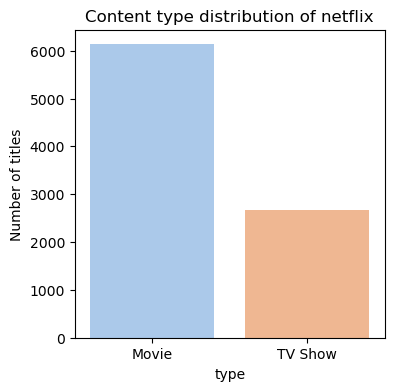

In [33]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_clean, x= 'type', palette='pastel')
plt.title("Content type distribution of netflix")
plt.ylabel("Number of titles")
plt.show()

### conclusion ###
the count plot shows a visible difference in the volume of TV Shows aired and the Movies. with Movie being the most frequent one. the plot can be used to predict that 60% of the content is movies

C:\Users\CC\AppData\Local\Temp\ipykernel_13728\2315072390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_clean, y ='rating', order=df_clean['rating'].value_counts().index, palette='coolwarm')


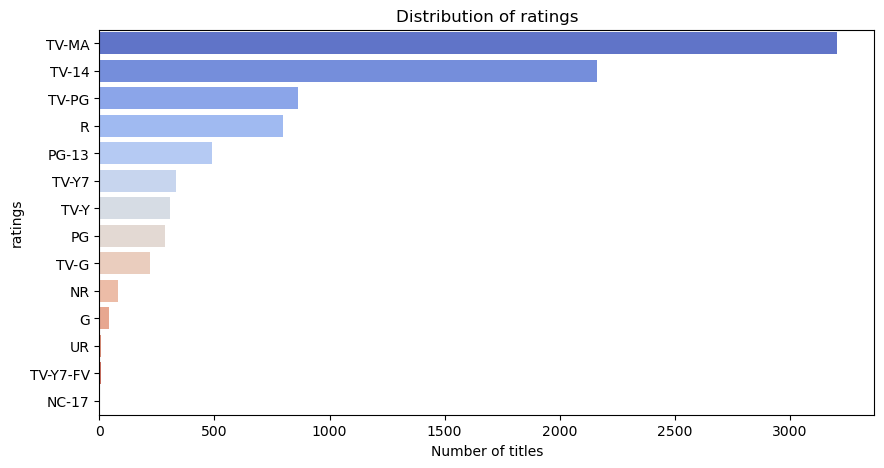

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_clean, y ='rating', order=df_clean['rating'].value_counts().index, palette='coolwarm')
plt.xlabel("Number of titles")
plt.ylabel("ratings")
plt.title("Distribution of ratings")
plt.show()

### Summary ###
most popular ratings is TV MA, and second to that is TV 14. this indicates that most content is purposefully created to target Adults and teens.

C:\Users\CC\AppData\Local\Temp\ipykernel_13728\1821896415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_clean, y='primary_genre', order=df_clean['primary_genre'].value_counts().index, palette='viridis')


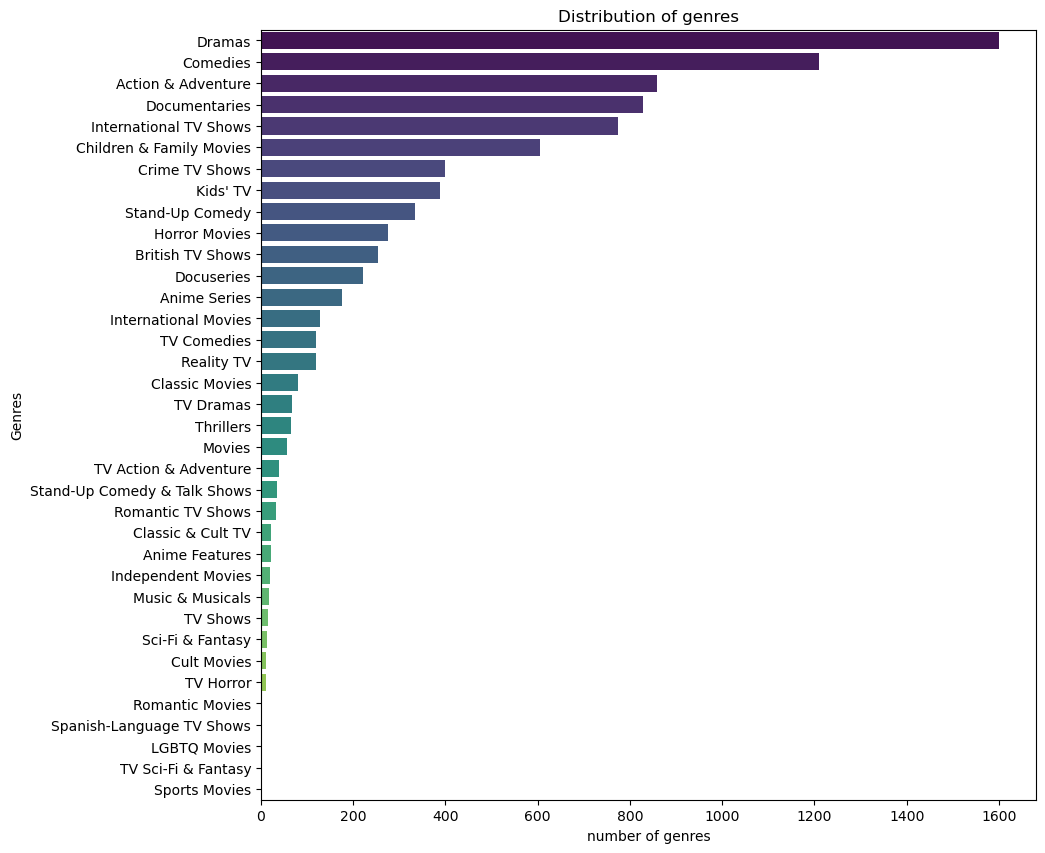

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(data= df_clean, y='primary_genre', order=df_clean['primary_genre'].value_counts().index, palette='viridis')
plt.title("Distribution of genres")
plt.ylabel("Genres")
plt.xlabel("number of genres")
plt.show()

### Summary ###
- with this plot we can conclude top 5 genres to be, dramas, comedies, Action & Adventure, Documentaries and International Tv shows.
- we can conclude genres such as sci fi and tv horrors are rarely produce

C:\Users\CC\AppData\Local\Temp\ipykernel_13728\144492291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_clean.dropna(subset='year_added'), x = 'year_added', palette="magma")


<function matplotlib.pyplot.show(close=None, block=None)>

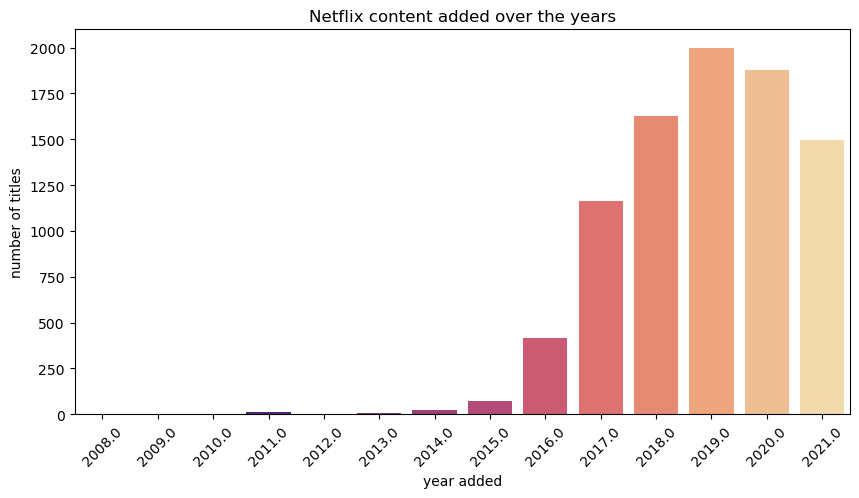

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data= df_clean.dropna(subset='year_added'), x = 'year_added', palette="magma")
plt.title("Netflix content added over the years")
plt.xlabel("year added")
plt.xticks(rotation=45)
plt.ylabel("number of titles")
plt.show

### Summary ###
- A surge in content can be seen following the year 2015
- this accounts to the global expansion netflix has seen in the last decade with movies and shows all over the globe

C:\Users\CC\AppData\Local\Temp\ipykernel_13728\550491786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean[df_clean['duration_type'] == 'Minutes'], x='duration_in_minutes', palette='Set2')


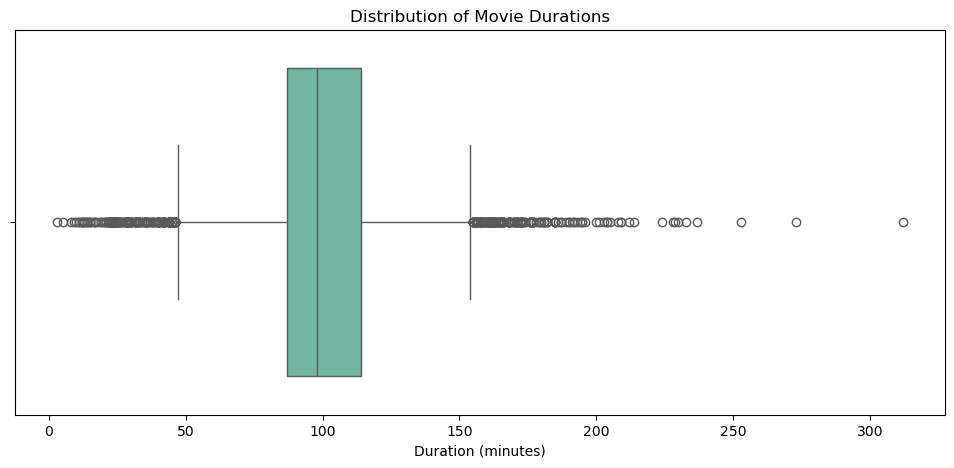

In [52]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_clean[df_clean['duration_type'] == 'Minutes'], x='duration_in_minutes', palette='Set2')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()


### Summary ###
- we can infer that average duration is between 90-120 minutes.
- few outliers can be observed, for example a few minutes long short films and more than 300 minute long films.